In [27]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from datafunction import *

In [11]:
#

game = pd.read_csv('../Fantasy-Premier-League/data/2021-22/gws/merged_gw.csv')
pd.set_option("display.max_columns",None)
sns.set_theme() # To apply basic seaborn theme

In [12]:
#the features I thought I built.

game.head()
column_game = game.columns
stats = game.describe()

In [13]:
# we now focus on teams info

team = game[['team','GW','kickoff_time','round', 'team_a_score', 'team_h_score','was_home']].drop_duplicates()
# dir(team)


In [17]:
# there is an potential to use goal difference and league position to determine team strenght that we might want to pass on to the model
# Methods are in datafunctions import

from datafunction import home_away

def adder (el):
    '''
    This another function used points in feature build
    '''

    score = pd.Series(el['team_h_score']-el['team_a_score']).apply(points) # so this will return a  pandas series, our evaluation returns a series. So we need to do our evaluation right over here
    score_a = pd.Series(el['team_a_score']-el['team_h_score']).apply(points) 
    combine = {'Home':score, 'Away':score_a,'was_home':el['was_home']}
    df = pd.DataFrame(combine).apply(home_away,axis=1) #.apply(home_away)

    return df

team['Points'] = team.pipe(adder) #.apply(home_away) # this argument passes itself as an instance
        


In [18]:

# looks like there is some reseting work 

team['Tally_Points'] = team.sort_values(by=['team','GW']).groupby('team')['Points'].cumsum()

team


,team,GW,kickoff_time,round,team_a_score,team_h_score,was_home,Points,Tally_Points
0,Man Utd,1,2021-08-14T11:30:00Z,1,1,5,True,3,3
1,Aston Villa,1,2021-08-14T14:00:00Z,1,2,3,False,0,0
2,Watford,1,2021-08-14T14:00:00Z,1,2,3,True,3,3
3,Southampton,1,2021-08-14T14:00:00Z,1,1,3,False,0,0
5,Liverpool,1,2021-08-14T16:30:00Z,1,3,0,False,3,3
...,...,...,...,...,...,...,...,...,...
23860,Chelsea,38,2022-05-22T15:00:00Z,38,1,2,True,3,73
23871,Spurs,38,2022-05-22T15:00:00Z,38,5,0,False,3,68
23875,Arsenal,38,2022-05-22T15:00:00Z,38,1,5,True,3,69
23876,Burnley,38,2022-05-22T15:00:00Z,38,2,1,True,0,34


In [19]:
team['team'].unique()
team

,team,GW,kickoff_time,round,team_a_score,team_h_score,was_home,Points,Tally_Points
0,Man Utd,1,2021-08-14T11:30:00Z,1,1,5,True,3,3
1,Aston Villa,1,2021-08-14T14:00:00Z,1,2,3,False,0,0
2,Watford,1,2021-08-14T14:00:00Z,1,2,3,True,3,3
3,Southampton,1,2021-08-14T14:00:00Z,1,1,3,False,0,0
5,Liverpool,1,2021-08-14T16:30:00Z,1,3,0,False,3,3
...,...,...,...,...,...,...,...,...,...
23860,Chelsea,38,2022-05-22T15:00:00Z,38,1,2,True,3,73
23871,Spurs,38,2022-05-22T15:00:00Z,38,5,0,False,3,68
23875,Arsenal,38,2022-05-22T15:00:00Z,38,1,5,True,3,69
23876,Burnley,38,2022-05-22T15:00:00Z,38,2,1,True,0,34


In [20]:
#here we need to figure out who is the opposing team


opps_df = game[['team','GW','round', 'team_a_score', 'team_h_score','was_home']].drop_duplicates()
opps_df

,team,GW,round,team_a_score,team_h_score,was_home
0,Man Utd,1,1,1,5,True
1,Aston Villa,1,1,2,3,False
2,Watford,1,1,2,3,True
3,Southampton,1,1,1,3,False
5,Liverpool,1,1,3,0,False
...,...,...,...,...,...,...
23860,Chelsea,38,38,1,2,True
23871,Spurs,38,38,5,0,False
23875,Arsenal,38,38,1,5,True
23876,Burnley,38,38,2,1,True


In [21]:
#let self merge first

pd.merge(opps_df
            ,opps_df
            ,how ='inner'
            ,left_on=['round','GW','team_a_score','team_h_score']
            ,right_on=['round','GW','team_h_score','team_a_score'])

# this g

,team_x,GW,round,team_a_score_x,team_h_score_x,was_home_x,team_y,team_a_score_y,team_h_score_y,was_home_y
0,Liverpool,1,1,3,0,False,Crystal Palace,0,3,False
1,Liverpool,1,1,3,0,False,Chelsea,0,3,True
2,Norwich,1,1,3,0,True,Crystal Palace,0,3,False
3,Norwich,1,1,3,0,True,Chelsea,0,3,True
4,Crystal Palace,1,1,0,3,False,Liverpool,3,0,False
...,...,...,...,...,...,...,...,...,...,...
1044,Brentford,38,38,2,1,True,Chelsea,1,2,True
1045,Leeds,38,38,2,1,False,Watford,1,2,False
1046,Leeds,38,38,2,1,False,Chelsea,1,2,True
1047,Burnley,38,38,2,1,True,Watford,1,2,False


In [29]:
# Self join to get the major attributes
T1 = pd.merge(game
        ,team.drop(['team_a_score','team_h_score','was_home','Points','GW'], axis=1) # drop these fields that we do not need
        ,how='left'
        ,left_on=['team','round']
        ,right_on=['team','round']
        ,suffixes=['','_t']
        )
T1 # we need to figure out a way to find the opposing team

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,kickoff_time_t,Tally_Points
0,Eric Bailly,DEF,Man Utd,0.0,0,0,0,0,0.0,286,6,0,0,0.0,0.0,2021-08-14T11:30:00Z,0,10,0,0,0,0,1,0,9363,1,5,0.0,0,0,0,0,50,True,0,1,2021-08-14T11:30:00Z,3
1,Keinan Davis,FWD,Aston Villa,0.4,0,0,0,0,0.0,49,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,18,0,0,0,0,1,0,169789,2,3,0.0,0,0,0,0,45,False,0,1,2021-08-14T14:00:00Z,0
2,Ayotomiwa Dele-Bashiru,MID,Watford,0.0,0,0,0,0,0.0,394,8,0,0,0.0,0.0,2021-08-14T14:00:00Z,0,2,0,0,0,0,1,0,4092,2,3,0.0,0,0,0,0,45,True,0,1,2021-08-14T14:00:00Z,3
3,James Ward-Prowse,MID,Southampton,2.3,0,0,20,0,30.5,341,4,3,0,5.2,21.6,2021-08-14T14:00:00Z,90,8,0,0,0,0,1,0,299682,1,3,0.0,2,0,0,0,65,False,0,1,2021-08-14T14:00:00Z,0
4,Bruno Miguel Borges Fernandes,MID,Man Utd,4.4,0,3,61,0,35.9,277,6,1,3,20.1,106.2,2021-08-14T11:30:00Z,90,10,0,0,0,0,1,0,3381004,1,5,59.0,20,0,0,0,120,True,0,1,2021-08-14T11:30:00Z,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,Wilfred Ndidi,MID,Leicester,0.0,0,0,0,0,0.0,216,377,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,16,0,0,0,0,38,0,70366,1,4,0.0,0,-202,22,224,48,True,0,38,2022-05-22T15:00:00Z,48
28637,Matt Ritchie,DEF,Newcastle,0.9,0,0,3,0,0.0,292,374,0,0,0.0,0.0,2022-05-22T15:00:00Z,1,5,0,0,0,0,38,0,15999,2,1,0.0,1,143,396,253,49,False,0,38,2022-05-22T15:00:00Z,46
28638,Nathan Redmond,MID,Southampton,3.4,0,0,5,0,0.0,336,377,3,0,0.0,0.0,2022-05-22T15:00:00Z,82,9,0,0,0,0,38,0,13856,1,4,0.0,2,455,683,228,59,False,0,38,2022-05-22T15:00:00Z,40
28639,Mathew Ryan,GK,Brighton,0.0,0,0,0,0,0.0,65,373,0,0,0.0,0.0,2022-05-22T15:00:00Z,0,19,0,0,0,0,38,0,587,1,3,0.0,0,-2,0,2,45,True,0,38,2022-05-22T15:00:00Z,50


In [30]:
# Self join the data to get 
T2 = (pd.merge(T1
                ,T1
                ,left_on=['name'] 
                ,right_on=['name']
                ,suffixes=("","_step")
                ).query("GW - GW_step == -1"))

                


In [37]:
#for readability


        


T2 =(T2
    .assign(was_home_ind =lambda x:T2['was_home'].replace({False: 0,True:1})) #previous game
    .assign(was_home_step_ind =lambda x:T2['was_home_step'].replace({False: 0,True:1})) # we will know next game info
    # .apply(playtime = lambda x:playtime(x))
    )
                

In [32]:

#adding one hot indicator for position
T2 = pd.get_dummies(data = T2,columns=["position"], prefix=["ind"])

                


In [40]:
# T1.minutes


T2['playtime'] = T2['minutes'].apply(playtime) # need to figure out how to chain this.
T2.to_csv('TransformedData/GWF.csv')

In [34]:
T2[['name','team','team_step','Tally_Points_step','Tally_Points']]



,name,team,team_step,Tally_Points_step,Tally_Points
1,Eric Bailly,Man Utd,Man Utd,4,3
48,Eric Bailly,Man Utd,Man Utd,7,4
95,Eric Bailly,Man Utd,Man Utd,10,7
142,Eric Bailly,Man Utd,Man Utd,13,10
189,Eric Bailly,Man Utd,Man Utd,13,13
...,...,...,...,...,...
1171279,Alex Kirk,Arsenal,Arsenal,66,63
1171312,Matthew Craig,Spurs,Spurs,62,61
1171313,Matthew Craig,Spurs,Spurs,65,61
1171314,Matthew Craig,Spurs,Spurs,62,61


In [35]:
def team_diff(row):
    return row['Tally_Points_step']
    



In [36]:
team[(team['team']== 'Man City')]


,team,GW,kickoff_time,round,team_a_score,team_h_score,was_home,Points,Tally_Points
20,Man City,1,2021-08-15T15:30:00Z,1,0,1,False,0,0
575,Man City,2,2021-08-21T14:00:00Z,2,0,5,True,3,3
1142,Man City,3,2021-08-28T11:30:00Z,3,0,5,True,3,6
1719,Man City,4,2021-09-11T14:00:00Z,4,1,0,False,3,9
2318,Man City,5,2021-09-18T14:00:00Z,5,0,0,True,1,10
2924,Man City,6,2021-09-25T11:30:00Z,6,1,0,False,3,13
3535,Man City,7,2021-10-03T15:30:00Z,7,2,2,False,1,14
4148,Man City,8,2021-10-16T14:00:00Z,8,0,2,True,3,17
4765,Man City,9,2021-10-23T16:30:00Z,9,4,1,False,3,20
5383,Man City,10,2021-10-30T14:00:00Z,10,2,0,True,0,20


In [19]:
import arviz as az
import pymc as py
T2.columns

Index(['name', 'team', 'xP', 'assists', 'bonus', 'bps', 'clean_sheets',
       'creativity', 'element', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'team_a_score', 'team_h_score', 'threat',
       'total_points', 'transfers_balance', 'transfers_in', 'transfers_out',
       'value', 'was_home', 'yellow_cards', 'GW', 'kickoff_time_t',
       'Tally_Points', 'position_step', 'team_step', 'xP_step', 'assists_step',
       'bonus_step', 'bps_step', 'clean_sheets_step', 'creativity_step',
       'element_step', 'fixture_step', 'goals_conceded_step',
       'goals_scored_step', 'ict_index_step', 'influence_step',
       'kickoff_time_step', 'minutes_step', 'opponent_team_step',
       'own_goals_step', 'penalties_missed_step', 'penalties_saved_step',
       'red_cards_step', 'round_step', 'saves_step', 'selec

In [20]:
# Isolate what we need from this dependant variables

depend = T2[[
            'GW'                                                    # Gameweek
            ,'playtime'                                             # this is an indicator function
            ,'xP'                                                   # this is an XP approach, i actually don't know what it means
            ,'transfers_balance', 'transfers_in', 'transfers_out'   # have to standardize this
            ,'ind_DEF', 'ind_FWD','ind_MID'                         #Position of players
            ,'was_home_ind'                                         # currently was this a home game?
            ,'was_home_step_ind'                                    # temporily this information is available to use
            ,'value'                                                # Current value of the player
            ,'total_points'                                         # Current performance of the player
            ,'Tally_Points'                                         # Points collected so far, need to rework this
            ,'value'                                                # Value of player
            ,'total_points_step'                                    #
            ]]


explain = pd.DataFrame(np.where(depend['total_points_step']<0,0,depend['total_points_step'])) # we cant have -ve poisson count so we defualt players

In [85]:

#Test properties

print('Depend Variables \n', depend.info())
print('Explainatory Detail :\n', 'Type of Data :',type(explain),'\n Length ',len(explain))


In [23]:

depend.sample(5)

# Standardize
explain['transfers_balance'].apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(2))


KeyError: 'transfers_balance'

In [ ]:
#We run the 

with py.Model() as TP_count:

    #define priors as weekly 
    b0 = py.Normal("intercept", mu=0, sigma=10)
    b1 = py.Normal("value", mu= 0,sigma=10)
    b2 = py.Normal("transfers_out", mu= 0,sigma=10)
    b3 = py.Normal("transfers_in", mu= 0,sigma=10)

    # our linear model 
    # theta = b0 +b1 * T1['value'] + b2 *T1['transfers_out'] + b3 *T1['transfers_in']
    theta = b0 + (b1 * depend['value'].values) + (b2 * depend['transfers_out'].values) + (b3 * depend['transfers_in'].values )  
    print((theta.ndim))

    # define poisson likelihood
    y = py.Poisson("y", mu=py.math.exp(theta), observed = (explain.values  ))  # one step ahead dependency forward

2


In [83]:

# carefull next time just make sure your target y is tractable
with TP_count:
    total_points = py.sample(1000, tune=1000,cores=4, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, value, transfers_out, transfers_in]


/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 160 seconds.


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'value'}>,
        <AxesSubplot:title={'center':'value'}>],
       [<AxesSubplot:title={'center':'transfers_out'}>,
        <AxesSubplot:title={'center':'transfers_out'}>],
       [<AxesSubplot:title={'center':'transfers_in'}>,
        <AxesSubplot:title={'center':'transfers_in'}>]], dtype=object)

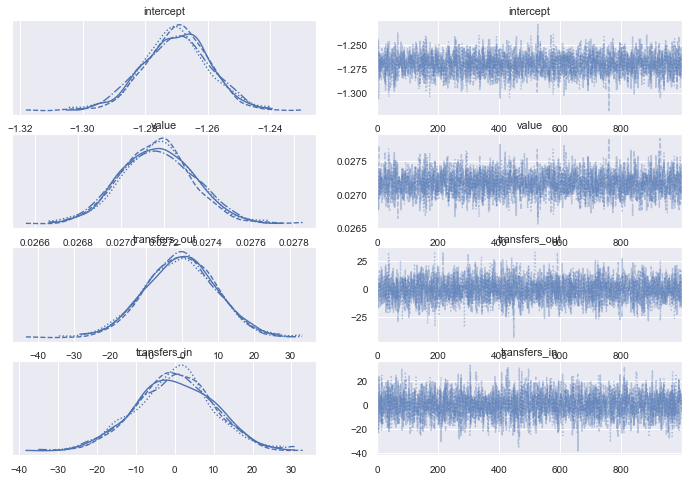

In [84]:

az.plot_trace(total_points)